In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, accuracy_score, classification_report, confusion_matrix

In [4]:
ranSeed = 66
IMG_SIZE = 224
ColorCh = 3
dataPath = '../../dataset/Fish_Dataset/Fish_Dataset'

In [5]:
category = []
for cat in os.listdir(dataPath):
    if not '.' in cat:
        category.append(cat)

print(category)

['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


In [6]:
def test_set_results(pred_value, X, y):    
    cnf_matrix = metrics.confusion_matrix(y, pred_value)
    fig=plt.figure(figsize=(10, 8))
    sns.heatmap(cnf_matrix,annot=True, fmt="d",cmap="Blues")
    
    tick_marks = np.arange(len(category))
    plt.xticks(tick_marks, category, rotation=45)
    plt.yticks(tick_marks, category, rotation=45)
    plt.show()

In [7]:
def printResults(model, X, y):  
    predictions = model.predict(X, batch_size=16)
    pred = np.argmax(predictions, axis=1)
    pred = [category[k] for k in pred]
    
    target_names = ['negative','positive']
    print(classification_report(y, predictions.argmax(axis=1), target_names=category))
    test_set_results(predictions.argmax(axis=1), X, y)

In [8]:
def eval_model(model, X, y, name):
    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('Final Accuracy on {}:'.format(name), accuracy,'\tLoss on {}:'.format(name), loss)
    print('---'*30)
    return accuracy

In [9]:
train_df1 = pd.read_pickle('../../preprocDF/set1Train.h5')
valid_df1 = pd.read_pickle('../../preprocDF/set1Valid.h5')
train_df2 = pd.read_pickle('../../preprocDF/set2Train.h5')
valid_df2 = pd.read_pickle('../../preprocDF/set2Valid.h5')

train_df = pd.read_pickle('../../preprocDF/train.h5')
valid_df = pd.read_pickle('../../preprocDF/valid.h5')
test_df = pd.read_pickle('../../preprocDF/test.h5')

In [10]:
X_train1 = train_df1.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_train1 = train_df1['label']

X_valid1 = valid_df1.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_valid1 = valid_df1['label']

X_train2 = train_df2.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_train2 = train_df2['label']

X_valid2 = valid_df2.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_valid2 = valid_df2['label']

X_train = train_df.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_train = train_df['label']

X_valid = valid_df.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_valid = valid_df['label']

X_test = test_df.drop(["label"],axis = 1).to_numpy().reshape(-1,IMG_SIZE,IMG_SIZE,ColorCh).astype(np.float32) / 255.0
y_test = test_df['label']

In [11]:
modelName = '../../model/set1.h5'

print('\nloading at {}'.format(modelName))

model1 = tf.keras.models.load_model(modelName)


loading at ../../model/set1.h5


In [12]:
X_data1 = np.concatenate((X_train1, X_valid1), axis=0)
y_data1 = np.concatenate((y_train1, y_valid1), axis=0)
X_data2 = np.concatenate((X_train2, X_valid2), axis=0)
y_data2 = np.concatenate((y_train2, y_valid2), axis=0)

------------------------------------------------------------------------------------------
Final Accuracy on set1: 0.9739259481430054 	Loss on set1: 0.11540301144123077
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.97      0.99      0.98       388
   Gilt-Head Bream       0.96      0.91      0.93       408
   Hourse Mackerel       0.99      0.97      0.98       361
        Red Mullet       1.00      0.99      1.00       347
     Red Sea Bream       0.94      0.98      0.96       381
          Sea Bass       0.95      0.97      0.96       380
            Shrimp       1.00      1.00      1.00       399
Striped Red Mullet       0.97      0.98      0.98       348
             Trout       0.99      0.98      0.98       363

          accuracy                           0.97      3375
         macro avg       0.97      0.97      0.97      3375
      weighted avg

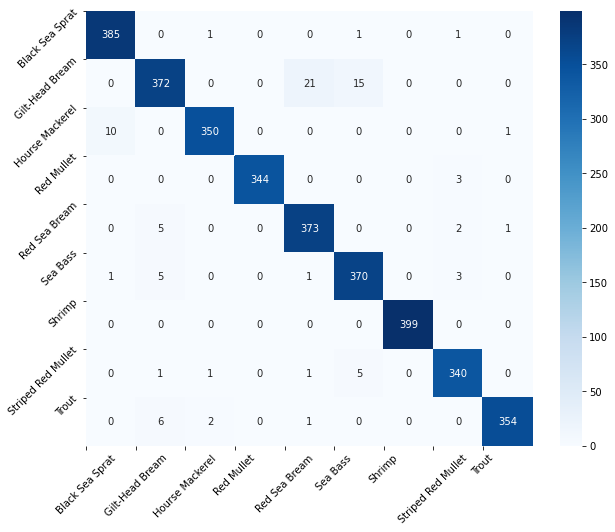

In [13]:
print('---'*30)
m1s1 = eval_model(model1, X_train1, y_train1, 'set1')
printResults(model1, X_train1, y_train1)

------------------------------------------------------------------------------------------
Final Accuracy on set1: 0.9486222267150879 	Loss on set1: 0.1747540533542633
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.97      0.97      0.97       659
   Gilt-Head Bream       0.88      0.87      0.88       662
   Hourse Mackerel       0.97      0.96      0.96       634
        Red Mullet       0.99      0.97      0.98       577
     Red Sea Bream       0.91      0.94      0.93       637
          Sea Bass       0.91      0.94      0.93       623
            Shrimp       0.99      1.00      1.00       642
Striped Red Mullet       0.94      0.95      0.94       582
             Trout       0.98      0.94      0.96       609

          accuracy                           0.95      5625
         macro avg       0.95      0.95      0.95      5625
      weighted avg 

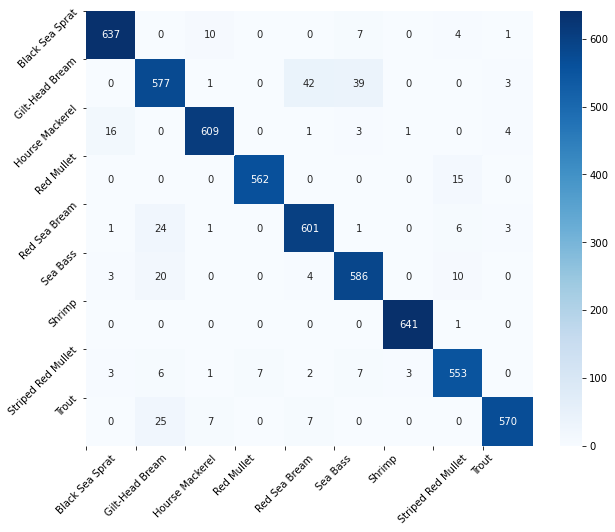

In [14]:
print('---'*30)
m1s1 = eval_model(model1, X_data1, y_data1, 'set1')
printResults(model1, X_data1, y_data1)

------------------------------------------------------------------------------------------
Final Accuracy on set2: 0.9168000221252441 	Loss on set2: 0.2532050907611847
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.91      0.94      0.92       618
   Gilt-Head Bream       0.85      0.81      0.83       612
   Hourse Mackerel       0.94      0.90      0.92       639
        Red Mullet       0.97      0.98      0.97       624
     Red Sea Bream       0.87      0.93      0.90       639
          Sea Bass       0.84      0.87      0.86       590
            Shrimp       0.99      0.99      0.99       629
Striped Red Mullet       0.93      0.91      0.92       644
             Trout       0.95      0.92      0.94       630

          accuracy                           0.92      5625
         macro avg       0.92      0.92      0.92      5625
      weighted avg 

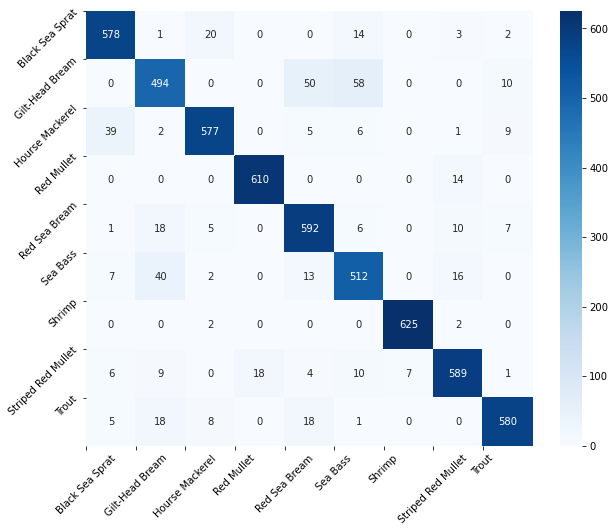

In [15]:
print('---'*30)
m1s2 = eval_model(model1, X_data2, y_data2, 'set2')
printResults(model1, X_data2, y_data2)

------------------------------------------------------------------------------------------
Final Accuracy on test: 0.9108444452285767 	Loss on test: 0.2636435031890869
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.90      0.93      0.92      1223
   Gilt-Head Bream       0.84      0.79      0.81      1226
   Hourse Mackerel       0.92      0.90      0.91      1227
        Red Mullet       0.97      0.96      0.96      1299
     Red Sea Bream       0.86      0.91      0.88      1224
          Sea Bass       0.86      0.89      0.87      1287
            Shrimp       0.98      1.00      0.99      1229
Striped Red Mullet       0.91      0.90      0.91      1274
             Trout       0.94      0.92      0.93      1261

          accuracy                           0.91     11250
         macro avg       0.91      0.91      0.91     11250
      weighted avg 

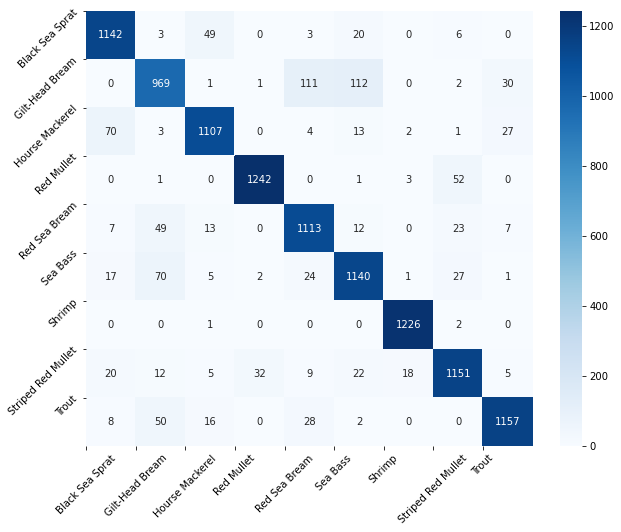

In [16]:
print('---'*30)
m1st = eval_model(model1, X_test, y_test, 'test')
printResults(model1, X_test, y_test)

In [17]:
modelName = '../../model/set1set2.h5'

print('\nloading at {}'.format(modelName))

model2 = tf.keras.models.load_model(modelName)


loading at ../../model/set1set2.h5


------------------------------------------------------------------------------------------
Final Accuracy on set1: 0.9564444422721863 	Loss on set1: 0.14108100533485413
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.96      0.98      0.97       659
   Gilt-Head Bream       0.93      0.86      0.89       662
   Hourse Mackerel       0.97      0.97      0.97       634
        Red Mullet       0.99      0.98      0.98       577
     Red Sea Bream       0.92      0.98      0.95       637
          Sea Bass       0.92      0.95      0.93       623
            Shrimp       0.99      1.00      1.00       642
Striped Red Mullet       0.96      0.94      0.95       582
             Trout       0.97      0.97      0.97       609

          accuracy                           0.96      5625
         macro avg       0.96      0.96      0.96      5625
      weighted avg

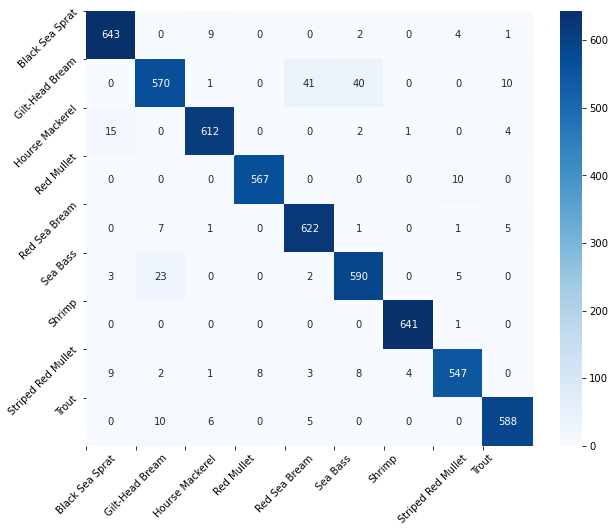

In [18]:
print('---'*30)
m2s1 = eval_model(model2, X_data1, y_data1, 'set1')
printResults(model2, X_data1, y_data1)

------------------------------------------------------------------------------------------
Final Accuracy on set2: 0.9582222104072571 	Loss on set2: 0.14287124574184418
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.96      0.98      0.97       618
   Gilt-Head Bream       0.93      0.86      0.89       612
   Hourse Mackerel       0.97      0.97      0.97       639
        Red Mullet       0.98      0.99      0.98       624
     Red Sea Bream       0.92      0.98      0.95       639
          Sea Bass       0.91      0.93      0.92       590
            Shrimp       1.00      1.00      1.00       629
Striped Red Mullet       0.97      0.96      0.96       644
             Trout       0.97      0.97      0.97       630

          accuracy                           0.96      5625
         macro avg       0.96      0.96      0.96      5625
      weighted avg

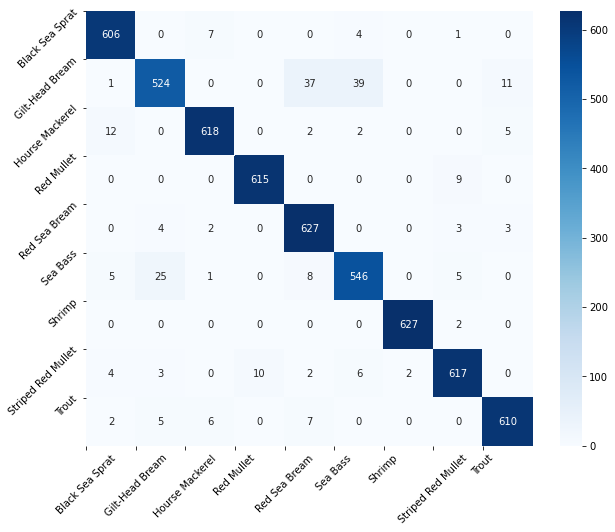

In [19]:
print('---'*30)
m2s2 = eval_model(model2, X_data2, y_data2, 'set2')
printResults(model2, X_data2, y_data2)

------------------------------------------------------------------------------------------
Final Accuracy on test: 0.9385777711868286 	Loss on test: 0.18733085691928864
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.92      0.97      0.94      1223
   Gilt-Head Bream       0.91      0.81      0.86      1226
   Hourse Mackerel       0.95      0.94      0.94      1227
        Red Mullet       0.98      0.97      0.98      1299
     Red Sea Bream       0.89      0.96      0.93      1224
          Sea Bass       0.91      0.91      0.91      1287
            Shrimp       0.99      1.00      0.99      1229
Striped Red Mullet       0.95      0.92      0.93      1274
             Trout       0.95      0.97      0.96      1261

          accuracy                           0.94     11250
         macro avg       0.94      0.94      0.94     11250
      weighted avg

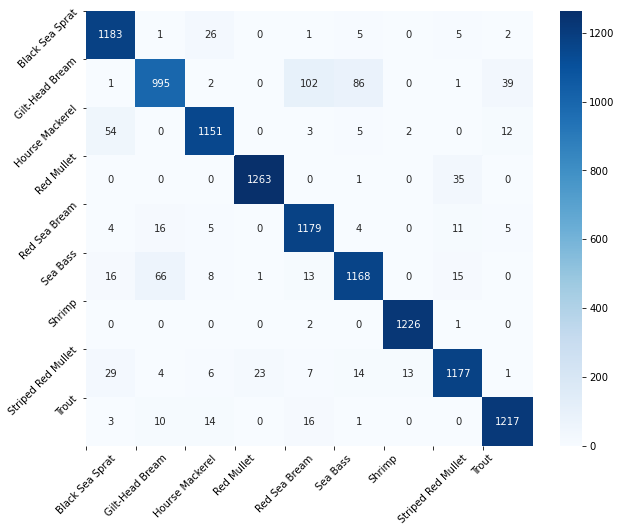

In [20]:
print('---'*30)
m2st = eval_model(model2, X_test, y_test, 'test')
printResults(model2, X_test, y_test)

In [21]:
modelName = '../../model/all.h5'

print('\nloading at {}'.format(modelName))

model3 = tf.keras.models.load_model(modelName)


loading at ../../model/all.h5


------------------------------------------------------------------------------------------
Final Accuracy on set1: 0.9580444693565369 	Loss on set1: 0.13386617600917816
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.94      0.99      0.97       659
   Gilt-Head Bream       0.94      0.86      0.90       662
   Hourse Mackerel       0.99      0.96      0.98       634
        Red Mullet       0.99      0.98      0.99       577
     Red Sea Bream       0.90      0.99      0.94       637
          Sea Bass       0.95      0.91      0.93       623
            Shrimp       0.99      1.00      1.00       642
Striped Red Mullet       0.97      0.94      0.95       582
             Trout       0.95      0.99      0.97       609

          accuracy                           0.96      5625
         macro avg       0.96      0.96      0.96      5625
      weighted avg

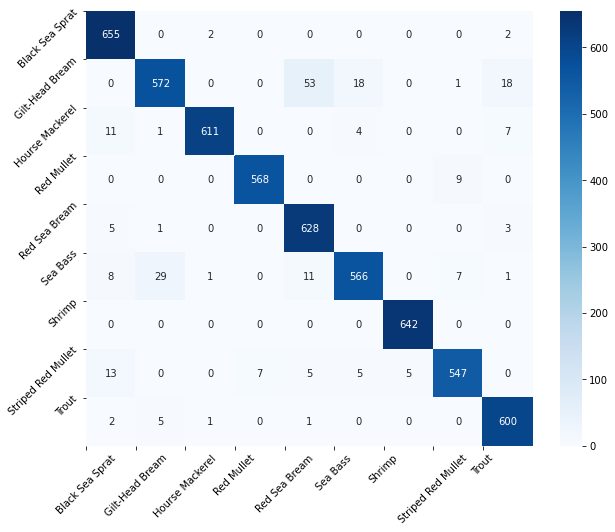

In [22]:
print('---'*30)
m3s1 = eval_model(model3, X_data1, y_data1, 'set1')
printResults(model3, X_data1, y_data1)

------------------------------------------------------------------------------------------
Final Accuracy on set2: 0.9599999785423279 	Loss on set2: 0.13210970163345337
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.95      0.99      0.97       618
   Gilt-Head Bream       0.95      0.86      0.91       612
   Hourse Mackerel       0.99      0.97      0.98       639
        Red Mullet       0.99      0.98      0.99       624
     Red Sea Bream       0.90      0.99      0.94       639
          Sea Bass       0.97      0.91      0.94       590
            Shrimp       0.99      1.00      0.99       629
Striped Red Mullet       0.98      0.95      0.97       644
             Trout       0.94      0.99      0.96       630

          accuracy                           0.96      5625
         macro avg       0.96      0.96      0.96      5625
      weighted avg

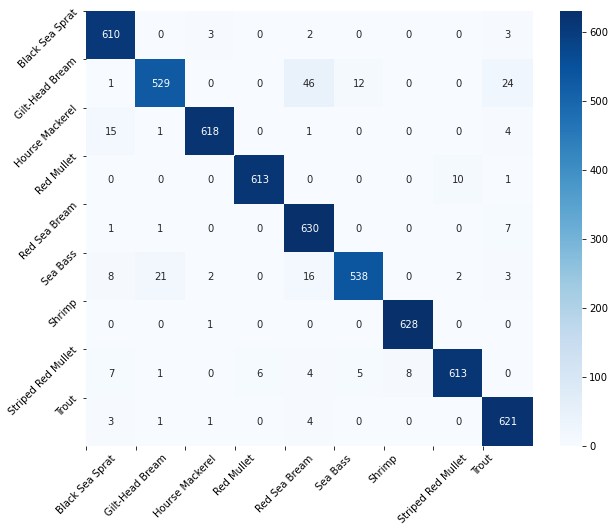

In [23]:
print('---'*30)
m3s2 = eval_model(model3, X_data2, y_data2, 'set2')
printResults(model3, X_data2, y_data2)

------------------------------------------------------------------------------------------
Final Accuracy on test: 0.9367111325263977 	Loss on test: 0.18852178752422333
------------------------------------------------------------------------------------------
                    precision    recall  f1-score   support

   Black Sea Sprat       0.91      0.97      0.94      1223
   Gilt-Head Bream       0.92      0.83      0.87      1226
   Hourse Mackerel       0.97      0.94      0.95      1227
        Red Mullet       0.98      0.96      0.97      1299
     Red Sea Bream       0.87      0.98      0.92      1224
          Sea Bass       0.95      0.87      0.91      1287
            Shrimp       0.97      1.00      0.99      1229
Striped Red Mullet       0.95      0.90      0.92      1274
             Trout       0.92      0.98      0.95      1261

          accuracy                           0.94     11250
         macro avg       0.94      0.94      0.94     11250
      weighted avg

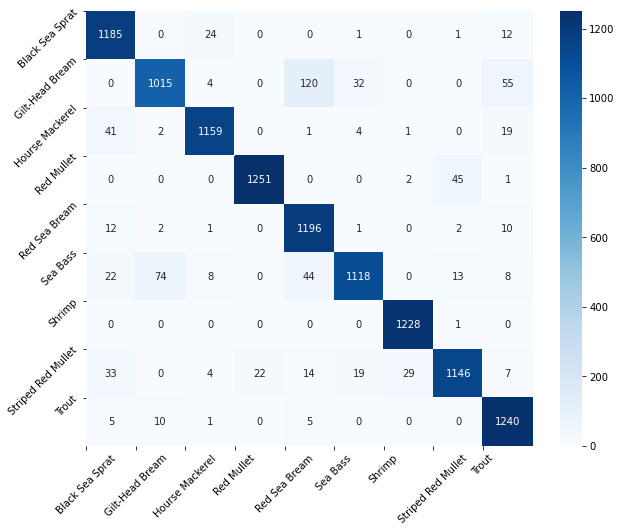

In [24]:
print('---'*30)
m3st = eval_model(model3, X_test, y_test, 'test')
printResults(model3, X_test, y_test)

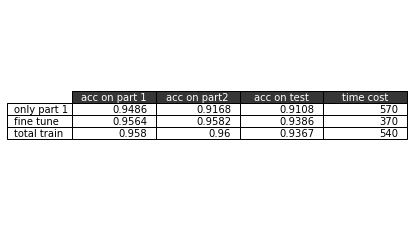

In [25]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[
        [round(m1s1,4),round(m1s2,4),round(m1st,4),570],
        [round(m2s1,4),round(m2s2,4),round(m2st,4),370],
        [round(m3s1,4),round(m3s2,4),round(m3st,4),540]
     ]
row_labels=["only part 1", "fine tune ", "total train"]
column_labels=["acc on part 1","acc on part2","acc on test","time cost"]
ax.axis('tight')
ax.axis('off')
tb = ax.table(cellText=data,colLabels=column_labels,rowLabels=row_labels,loc="center")
tb[0, 0].set_facecolor('#363636')
tb[0, 0].set_text_props(color='w')

tb[0, 1].set_facecolor('#363636')
tb[0, 1].set_text_props(color='w')

tb[0, 2].set_facecolor('#363636')
tb[0, 2].set_text_props(color='w')

tb[0, 3].set_facecolor('#363636')
tb[0, 3].set_text_props(color='w')




plt.show()